In [1]:
import numpy as np
import matplotlib.pyplot as plt

1. Class Definition:

This code defines a class called KNN. This class represents a K-Nearest Neighbors classifier.

2. Initialization (__init__ method):

When you create an object of this class, you need to provide three arguments:

X_train: This is a 2D array containing the training data points. Each row represents a data point, and each column represents a feature.
y_train: This is a 1D array containing the target labels for the training data points. The length of this array should match the number of rows in X_train.
k (optional): This is an integer representing the number of nearest neighbors to consider for classification. The default value is set to 5.
Inside the __init__ method, these arguments are stored as attributes of the object:

self.k: This stores the value of k.
self.X_train: This stores the training data points.
self.y_train: This stores the target labels for the training data points.

3. Prediction (predict method):

This method takes a new data point (X_test) as input, which can be a single data point (a 1D array) or multiple data points (a 2D array).
It iterates through each data point in X_test:
Calculates the distances between the current data point and all the training data points using np.linalg.norm.
Sorts the indices of the training data points based on their distances to the current data point (using np.argsort).
Selects the k nearest neighbors based on the sorted indices.
Extracts the target labels (y_train) of those nearest neighbors.
Finds the most common label (the mode) among the nearest neighbors using max and neighbor_labels.count.
Appends the most common label as the predicted label for the current data point to a list y_pred.
Finally, the method returns a NumPy array containing the predicted labels for all data points in X_test.

In [8]:
class KNN:
    def __init__(self, X_train, y_train, k=5):
        self.k = k
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            distances = np.linalg.norm(x - self.X_train, axis=1)
            sorted_distances_indices = np.argsort(distances)[:self.k]
            neighbor_labels = [self.y_train[y] for y in sorted_distances_indices]
            most_common = max(neighbor_labels, key=neighbor_labels.count)
            y_pred.append(most_common)
        return np.array(y_pred)

This code creates a scatter plot of 50 random data points.

np.random.seed(42) sets a seed for generating random numbers (for reproducibility).
X is a 2D array with 50 rows (data points) and 2 columns (features). Each row represents a point's location in 2D space with random values between 0 and 1.
y is a 1D array with 50 labels (either 0 or 1) randomly assigned to each data point.
plt.scatter plots the points based on their features (X) with colors corresponding to their labels (y).
The plot is then displayed with a title "Random Points".

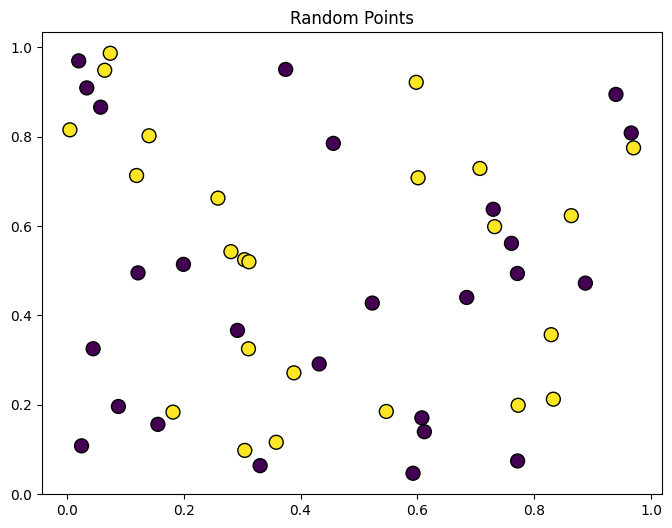

In [10]:
np.random.seed(42)
num_points = 50
X = np.random.rand(num_points, 2)
y = np.random.randint(0, 2, num_points)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('Random Points')
plt.show()

In this step of the Python code, the KNN algorithm is used to classify new data points. This is done by following these steps:

Create a meshgrid:

A meshgrid is created with the specified step size h.
The meshgrid covers the range of the data points, extending from x_min to x_max and y_min to y_max.
This is achieved using the np.arange and np.meshgrid functions.

Train the KNN classifier:

A KNN classifier is created using the KNN module from the scikit-learn library.
The training dataset X and the corresponding target variables y are passed to the classifier.
The parameter k is set to 5, which means that the 5 nearest neighbors will be used to classify a new data point.

Make predictions on the meshgrid:

The predict method of the KNN classifier is used to predict the class for each point in the meshgrid.
The predictions are stored in an array Z.

Visualize the results:

The contourf function from the matplotlib library is used to visualize the decision boundaries of the KNN algorithm on the meshgrid.
The data points are also plotted in the same diagram with different colors for different classes.
The title and label of the plot are adjusted accordingly.

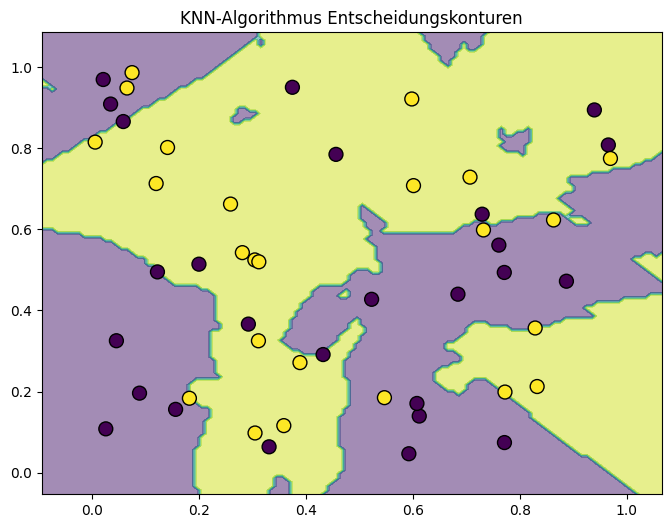

In [18]:
h = .01
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

knn = KNN(X, y, k=5)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('KNN-Algorithmus Entscheidungskonturen')
plt.show()